# 의사결정 나무(Decision Tree)
### 1) 의사결정나무 모형(moons 데이터 셋)

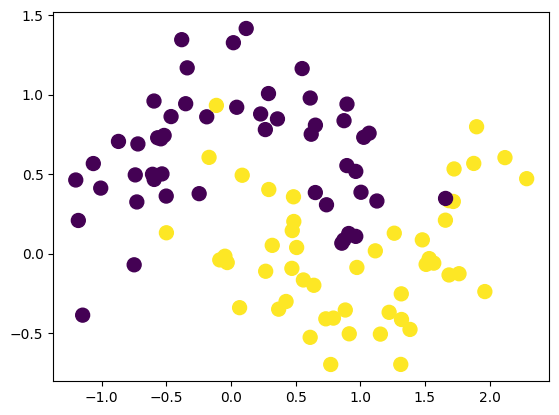

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

#noise 표준편차
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, s=100)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [12]:
from sklearn.tree import DecisionTreeClassifier

# criterion(entropy,gini)
model = DecisionTreeClassifier(random_state=2,max_depth=3,criterion='entropy')
#                                               가지치기     평가기준          혼잡 최소  최대
#                                                                     entropy     0.0 ~ 1.0
#                                                                     gini        0.0 ~ 0.5
model.fit(X_train, y_train)

print("학습용:",model.score(X_train, y_train))
print("검증용:",model.score(X_test, y_test))

학습용: 0.9066666666666666
검증용: 0.92


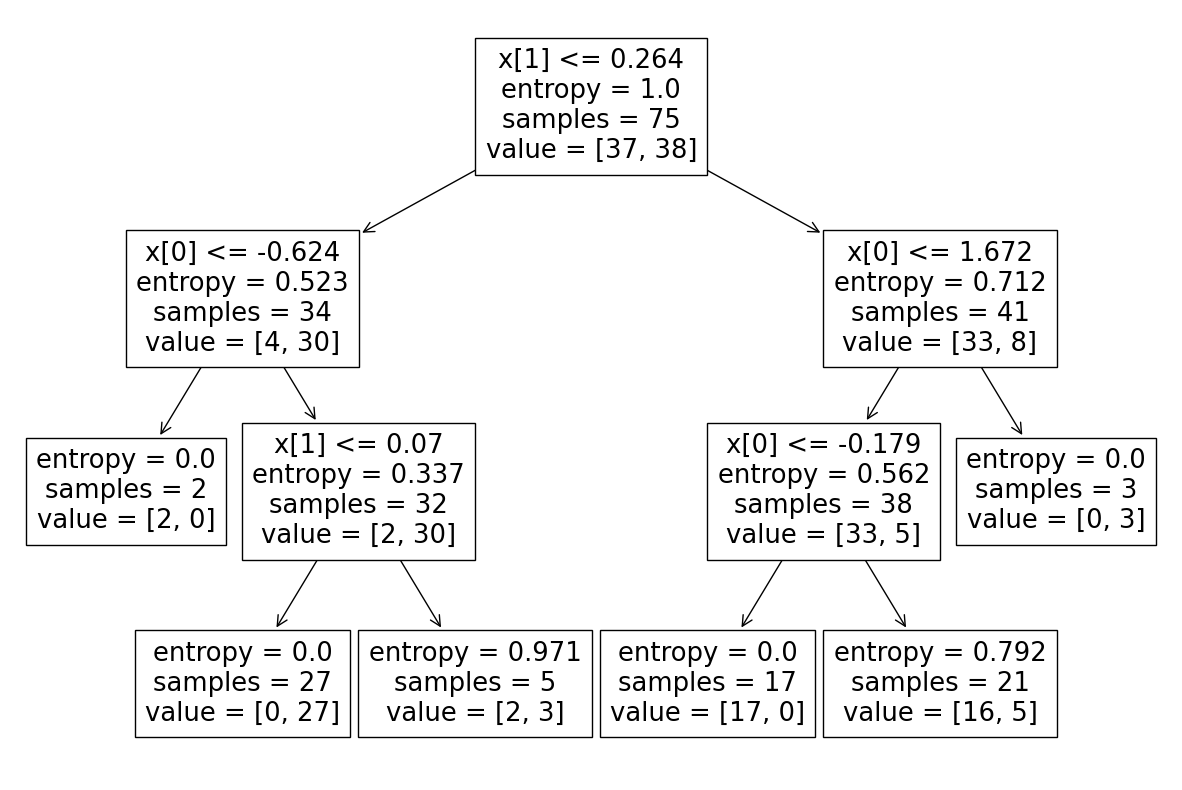

In [13]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(model)
plt.show()

In [14]:
#동전 던지기를 했는데 앞뒤면이 반반씩 나온다면 불확실성 최대, 한면만 계속 나온다면 순도 최대
#엔트로피 : A 영역에 속한 모든 샘플이 동일한 범주에 속할 경우(무질서,불확실성  최소, 순도 최대) => 엔트로피 0
#   반반씩 섞여 있을 경우(불확실성 최대, 순도 최소) => 엔트로피 1
#gini index(지니 계수) : 0.0~0.5의 값, 작을수록 분류가 잘된 것(0이면 불확실성 최소, 순도 최대),  0.5이면 불확실성 최대, 순도 최소

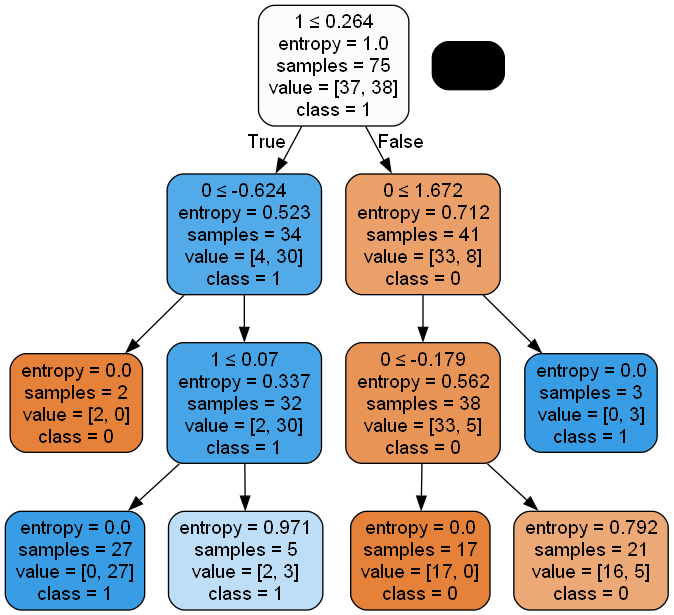

In [15]:
# graphviz exe 설치(path 추가 옵션 선택)

from sklearn.tree import export_graphviz
import pydotplus
import graphviz
from IPython.display import Image
import os

os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'
dot_data = export_graphviz(model, out_file=None, feature_names=[0,1], class_names=['0','1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

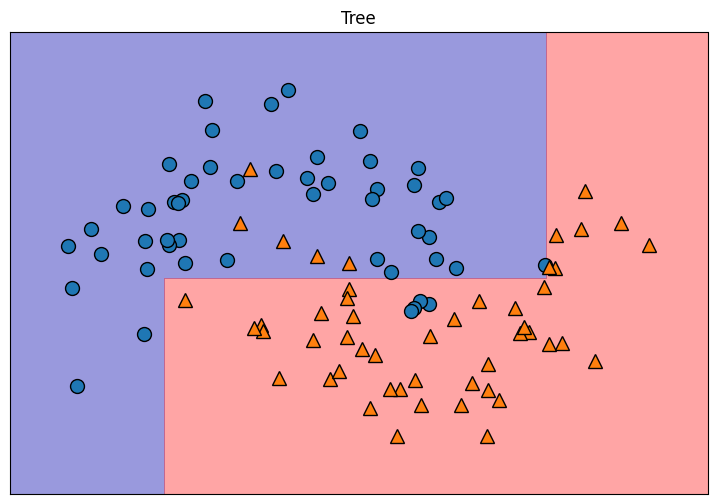

In [16]:
# 에러가 발생할 경우 
# pip install joblib==1.1.0

import matplotlib.pyplot as plt
import mglearn

plt.figure(figsize=(9,6))
plt.title("Tree")

#클래스 구분면
mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=0.4)

#산점도
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)